In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [298]:
df = pd.read_csv('C:/Users/ASUS/Documents/Iris/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [299]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [300]:
#detecting missing value

missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Id
False    150
Name: Id, dtype: int64

SepalLengthCm
False    150
Name: SepalLengthCm, dtype: int64

SepalWidthCm
False    150
Name: SepalWidthCm, dtype: int64

PetalLengthCm
False    150
Name: PetalLengthCm, dtype: int64

PetalWidthCm
False    150
Name: PetalWidthCm, dtype: int64

Species
False    150
Name: Species, dtype: int64



In [301]:
#describing species

df.drop('Id', axis=1, inplace=True)
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [302]:
#creating new dataset based on the species type

setosa = df[df['Species']=='Iris-setosa']
versicolor = df[df['Species']=='Iris-versicolor']
virginica = df[df['Species']=='Iris-virginica']

In [303]:
#describing characteristic from each species type based on Sepal & Petal measurement

setosa.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [304]:
versicolor.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [305]:
virginica.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [308]:
df['Species'] = df['Species'].astype('category').cat.codes
X = df.iloc[:,:4].values
Y = df.iloc[:,4].values

In [370]:
#o: Iris setosa
#1: Iris versicolor
#2: Iris verginica

In [334]:
#Splitting into Training Set dan Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [335]:
#Trial K-NN Model with initial k=3

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [338]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [339]:
#Creating model based on Train Set

Y_pred_train = classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_train, Y_pred_train))  
print(classification_report(Y_train, Y_pred_train))

[[25  0  0]
 [ 0 36  3]
 [ 0  3 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      0.92      0.92        39
           2       0.93      0.93      0.93        41

    accuracy                           0.94       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.94      0.94      0.94       105



In [340]:
#Creating model based on Test Set

Y_pred_test = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, Y_pred_test))  
print(classification_report(Y_test, Y_pred_test))

[[25  0  0]
 [ 0 10  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.91      0.95        11
           2       0.90      1.00      0.95         9

    accuracy                           0.98        45
   macro avg       0.97      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [341]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)
accuracy_train, accuracy_test

(0.9428571428571428, 0.9777777777777777)

In [342]:
Y_test == Y_pred_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

Text(0, 0.5, 'Error rata-rata')

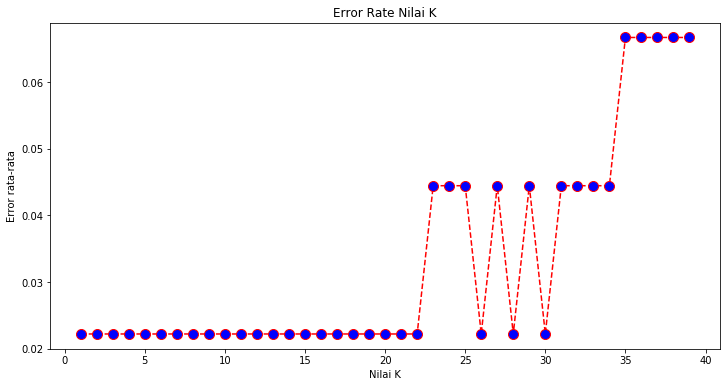

In [343]:
#Deciding the optimum K

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata')

In [344]:
#Trying to build model with k=10

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, Y_train)

Y_pred_test10 = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, Y_pred_test10))  
print(classification_report(Y_test, Y_pred_test10))
print('Accuracy_test=', accuracy_score(Y_test, Y_pred_test10))

[[25  0  0]
 [ 0 10  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.91      0.95        11
           2       0.90      1.00      0.95         9

    accuracy                           0.98        45
   macro avg       0.97      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Accuracy_test= 0.9777777777777777


In [345]:
Y_test == Y_pred_test10

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [346]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
Y_predict_train_ = logistic_regression.predict(X_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.97      0.95      0.96        39
           2       0.95      0.98      0.96        41

    accuracy                           0.97       105
   macro avg       0.98      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

Accuracy: 0.9714285714285714


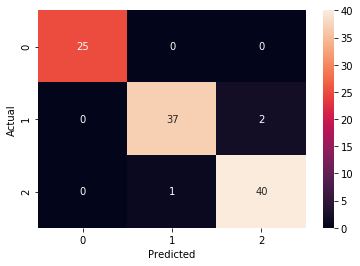

In [347]:
#Evaluating model on Train Set

print(classification_report(Y_train, Y_predict_train_))
print("Accuracy:",metrics.accuracy_score(Y_train, Y_predict_train_))

confusion_matrix = pd.crosstab(Y_train, Y_predict_train_, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      1.00      0.96        11
           2       1.00      0.89      0.94         9

    accuracy                           0.98        45
   macro avg       0.97      0.96      0.97        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


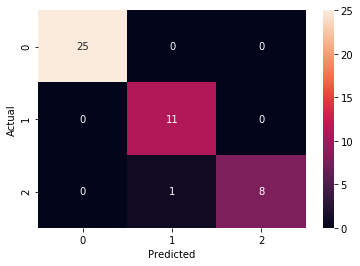

In [348]:
#Evaluating model on Test Set

logistic_regression = LogisticRegression()
logistic_regression.fit(X_test, Y_test)
Y_predict_test_ = logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(Y_test, Y_predict_test_, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print(classification_report(Y_test,Y_predict_test_))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_predict_test_))

In [368]:
logit_model=sm.MNLogit(Y_test,sm.add_constant(X_test))
logit_model

result=logit_model.fit()
stats=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

         Current function value: 0.000000
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   45
Model:                        MNLogit   Df Residuals:                       35
Method:                           MLE   Df Model:                            8
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                   1.000
Time:                        23:29:07   Log-Likelihood:            -1.2659e-08
converged:                      False   LL-Null:                       -44.676
Covariance Type:            nonrobust   LLR p-value:                 6.295e-16
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.1111   1.36e+05      0.000      1.000   -2.67e+05    2.67e+05
x1            -4.4103   2.56e+05  -1.72e-05      1.000   -5.02e+0

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Results: MNLogit
Model:                 MNLogit           Pseudo R-squared:  1.000      
Dependent Variable:    y                 AIC:               20.0000    
Date:                  2020-10-23 23:52  BIC:               38.0666    
No. Observations:      45                Log-Likelihood:    -1.2659e-08
Df Model:              8                 LL-Null:           -44.676    
Df Residuals:          35                LLR p-value:       6.2949e-16 
Converged:             0.0000            Scale:             1.0000     
No. Iterations:        35.0000                                         
-----------------------------------------------------------------------
 y = 0   Coef.     Std.Err.      t    P>|t|      [0.025       0.975]   
-----------------------------------------------------------------------
const    22.1111  136311.2447  0.0002 0.9999  -267143.0192  267187.2415
   x1    -4.4103  256144.1820 -0.0000 1.0000  -502037.7819  502028.9613
   x2   -14.6854  46